In [199]:
%reload_ext autoreload
%autoreload 2

from MBN_Res_Constrn import MBN_RC
import matplotlib.pyplot as plt
import numpy as np

### Time series

In [200]:
swn = MBN_RC(nepochs=40000, 
             dt=0.05, 
             lambda_o=2.89, 
             alpha=0.01,
             beta=0.002,
             plot_bifurcation=False)
swn.run_model()

d:\__nitin_private__\__iitj__\assignment-iitj-main\tES\Mouse brain network\MouseBrainLib\mb_communities.npz already exists
DataUtils initialized
Average shortest path length:  2.1057608395470866
Avg clustering coefficient:  0.37852781810835767
LAMBDA_O=2.89, Global Order(R)=0.04820425129754188
LAMBDA_O=2.89, Global Order(R)=0.017843685325043577
LAMBDA_O=2.89, Global Order(R)=0.007915555823762431
LAMBDA_O=2.89, Global Order(R)=0.04962895648707873
LAMBDA_O=2.89, Global Order(R)=0.05944448367247567
LAMBDA_O=2.89, Global Order(R)=0.05939082850615248
LAMBDA_O=2.89, Global Order(R)=0.031064352859234718
LAMBDA_O=2.89, Global Order(R)=0.08955506393291673
LAMBDA_O=2.89, Global Order(R)=0.1676852072218707
LAMBDA_O=2.89, Global Order(R)=0.40123304042842156
LAMBDA_O=2.89, Global Order(R)=0.028550862685028724
LAMBDA_O=2.89, Global Order(R)=0.05318918229863313
LAMBDA_O=2.89, Global Order(R)=0.15526452268231533
LAMBDA_O=2.89, Global Order(R)=0.13066377632403
LAMBDA_O=2.89, Global Order(R)=0.070453862

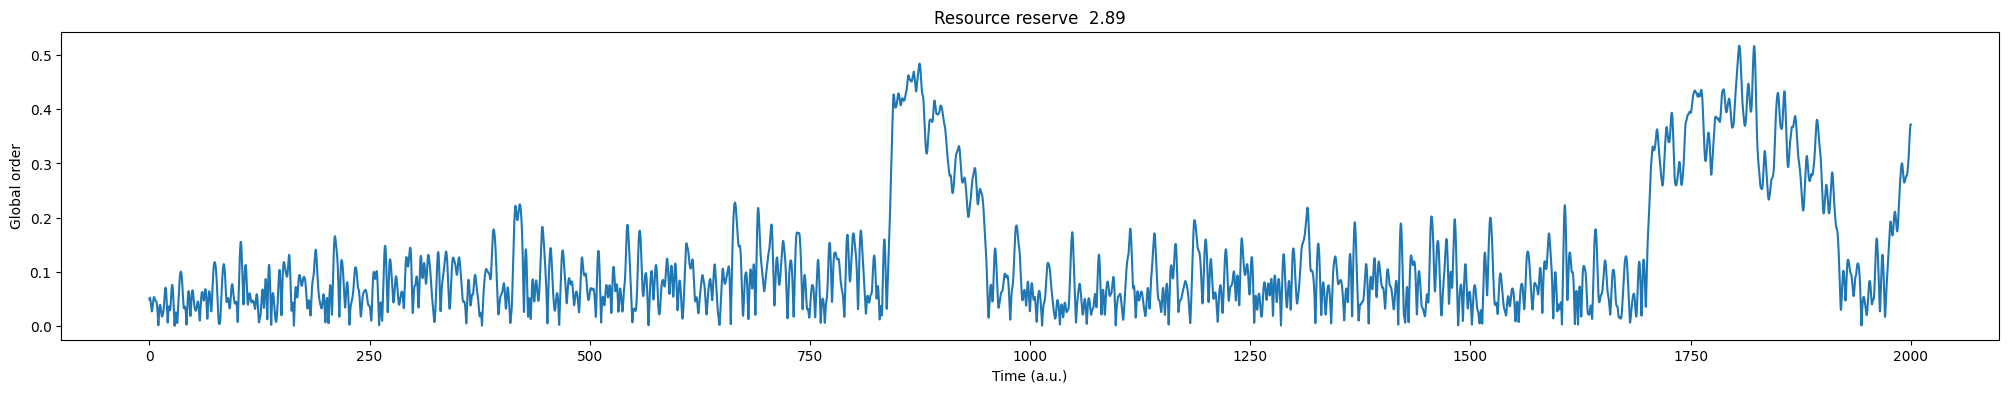

In [201]:
f = plt.figure(figsize=(25, 4))
plt.title("Resource reserve  " + str(swn.LAMBDA_O)) 
plt.plot(np.linspace(0, swn.NEPOCHS-1, swn.NEPOCHS)*swn.DT, swn.GLOBAL_ORDER_VERBOSE)
plt.ylabel("Global order")
plt.xlabel("Time (a.u.)")
plt.show()

In [202]:
mbn = MBN_RC(nepochs=40000, 
             dt=0.05, 
             lambda_o=2.92, 
             alpha=0.01,
             beta=0.002,
             plot_bifurcation=False)
mbn.run_model()

d:\__nitin_private__\__iitj__\assignment-iitj-main\tES\Mouse brain network\MouseBrainLib\mb_communities.npz already exists
DataUtils initialized
Average shortest path length:  2.1057608395470866
Avg clustering coefficient:  0.37852781810835767
LAMBDA_O=2.92, Global Order(R)=0.05160336560848094
LAMBDA_O=2.92, Global Order(R)=0.040302757724079014
LAMBDA_O=2.92, Global Order(R)=0.04735537213051317
LAMBDA_O=2.92, Global Order(R)=0.25129606384697367
LAMBDA_O=2.92, Global Order(R)=0.49313074787223776
LAMBDA_O=2.92, Global Order(R)=0.5582192683883085
LAMBDA_O=2.92, Global Order(R)=0.5334843208050659
LAMBDA_O=2.92, Global Order(R)=0.5588022951519253
LAMBDA_O=2.92, Global Order(R)=0.5084553130123247
LAMBDA_O=2.92, Global Order(R)=0.5529951729102235
LAMBDA_O=2.92, Global Order(R)=0.4808729843208102
LAMBDA_O=2.92, Global Order(R)=0.5473466781570321
LAMBDA_O=2.92, Global Order(R)=0.5299861503652568
LAMBDA_O=2.92, Global Order(R)=0.4529470171066992
LAMBDA_O=2.92, Global Order(R)=0.5927552096647285


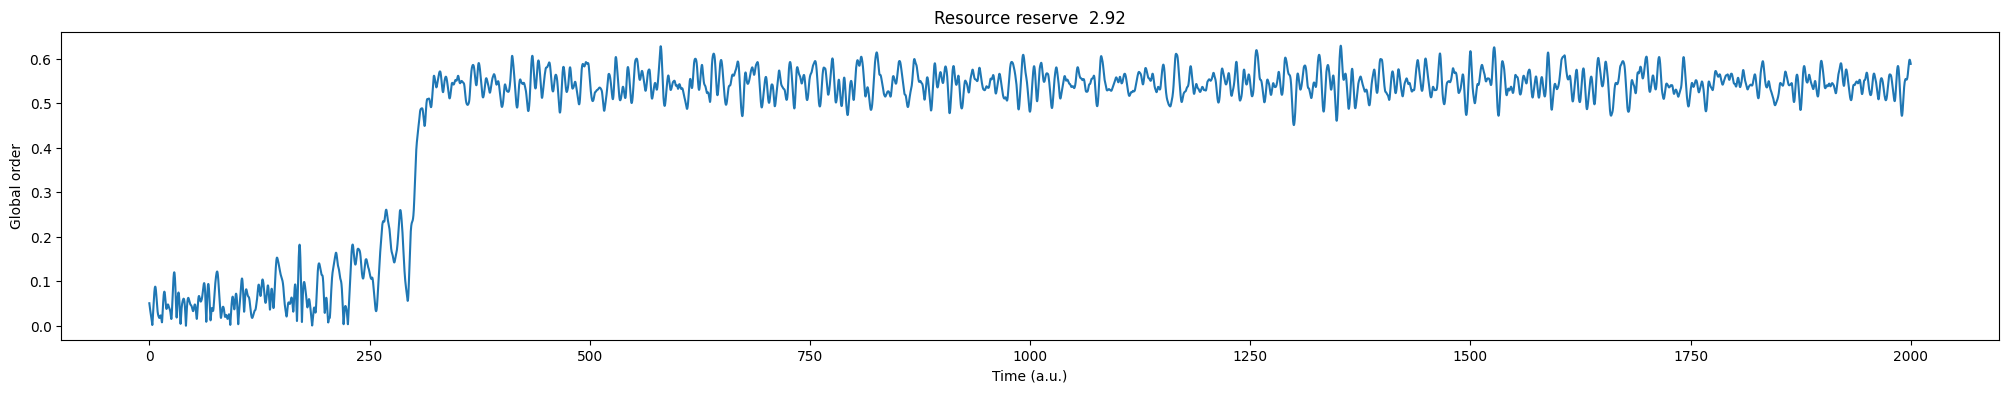

In [314]:
f = plt.figure(figsize=(25, 4))
plt.title("Resource reserve  " + str(mbn.LAMBDA_O)) 
plt.plot(np.linspace(0, mbn.NEPOCHS-1, mbn.NEPOCHS)*mbn.DT, mbn.GLOBAL_ORDER_VERBOSE)
plt.ylabel("Global order")
plt.xlabel("Time (a.u.)")
plt.show()

<h1><b>Code to Count No. of transitions</b></h1>

In [306]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


def butter_lowpass(cutoff, fs, order=5):
    """Lowpass Filter

    Args:
        cutoff (_type_): float
        fs (_type_): int
        order (int, optional): int

    """
    
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    
    return b, a


def sliding_window(sequence, window_size, stride=1):
    """Sliding Window

    Args:
        sequence (_type_): array
        window_size (_type_): int
        stride (int, optional): int

    Yields:
        _type_: int, array
    """

    seq_length = len(sequence)
    if window_size > seq_length:
        raise ValueError("Window size cannot be larger than the sequence length.")

    for start in range(0, seq_length - window_size + 1, stride):
        end = start + window_size
        yield start, end, sequence[start:end]



def count_transitions_time(data, t, fs, cutoff_freq, window_size, stride, threshold):
    """Counts Total no. of Transitions

    Args:
        data (_type_): array
        t (_type_): array
        fs (_type_): int
        cutoff_freq (_type_): float
        window_size (_type_): int
        stride (_type_): int
        threshold (_type_): float

    Returns:
        _type_: array, array
    """

    b, a = butter_lowpass(cutoff_freq, fs)
    filtered_data = filtfilt(b, a, data)
    
    fig = plt.figure(figsize=(25, 4))
    plt.plot(t, filtered_data)
    
    trans_time_start = []
    trans_time_end = []
    for s_idx, e_idx, window in sliding_window(filtered_data, window_size, stride):
        if window[0]<=threshold:
            for j in range(len(window)):
                if window[j]>(threshold) and (s_idx/fs) not in trans_time_start:
                    trans_time_start.append(s_idx/fs)

    return trans_time_start, trans_time_end, filtered_data

Total Transitions: 2 
Transition Time Starts: [837.0, 1700.1]


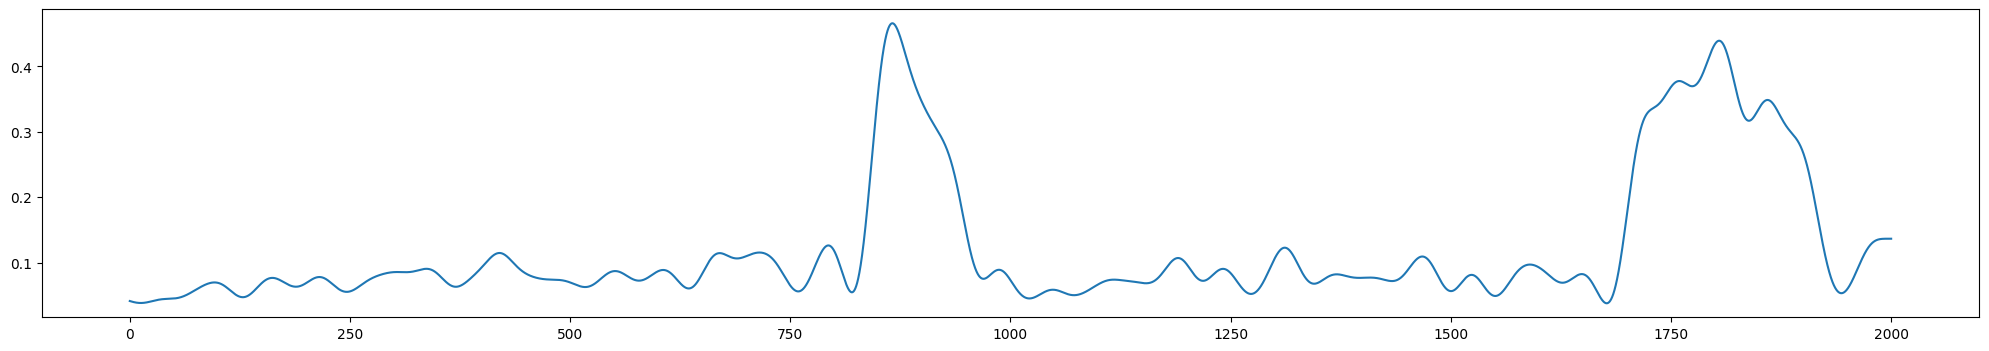

In [379]:
data = swn.GLOBAL_ORDER_VERBOSE
cutoff_freq = 0.02
fs = 20
t = np.linspace(0, swn.NEPOCHS-1, swn.NEPOCHS)*swn.DT
f_signal = 2.0

trans_time_start, trans_time_end, filt_1 = count_transitions_time(data=data, t=t, fs=fs, cutoff_freq=cutoff_freq, window_size=10, stride=9, threshold=0.18)
print(
    "Total Transitions:", len(trans_time_start), 
    "\nTransition Time Starts:", trans_time_start,
    # "\nTransition Time Ends:", trans_time_end
)

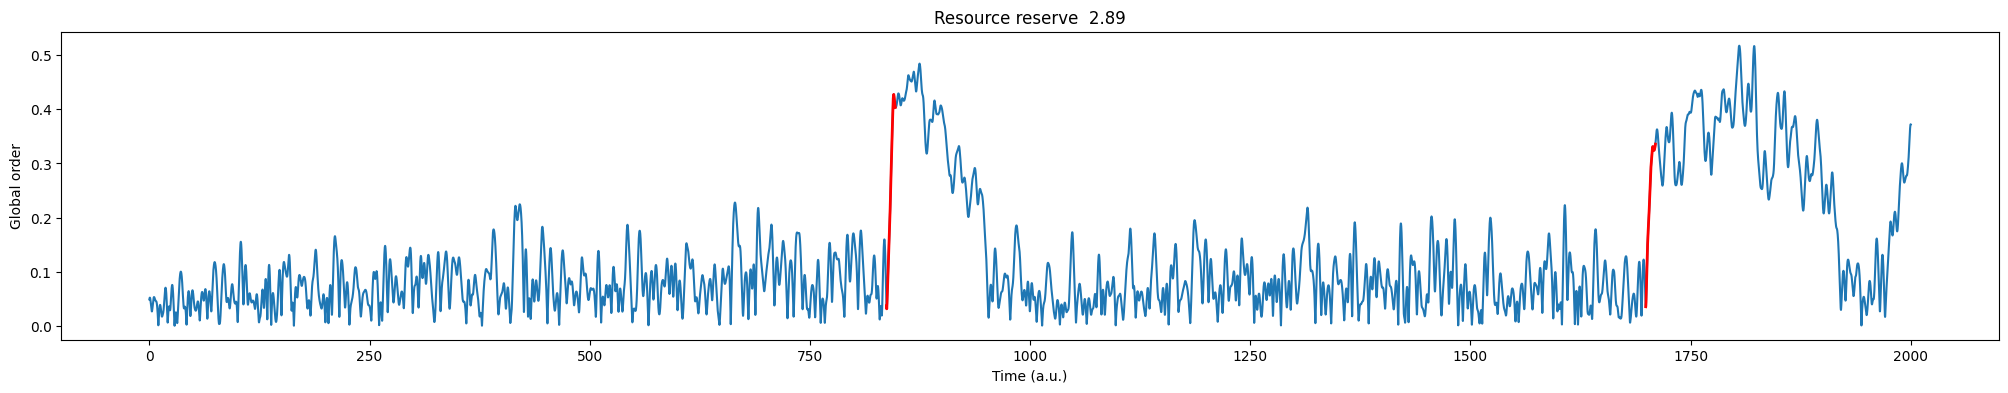

In [387]:
f = plt.figure(figsize=(25, 4))
plt.title("Resource reserve  " + str(swn.LAMBDA_O)) 
plt.plot(np.linspace(0, swn.NEPOCHS-1, swn.NEPOCHS)*swn.DT, swn.GLOBAL_ORDER_VERBOSE)

highlight_start = [int(i*20) for i in trans_time_start]
highlight_end = [int(i*20 + 200) for i in trans_time_start]

plt.plot((np.linspace(0, swn.NEPOCHS-1, swn.NEPOCHS)*swn.DT)[highlight_start[0]:highlight_end[0]], swn.GLOBAL_ORDER_VERBOSE[highlight_start[0]:highlight_end[0]], label='Highlighted Section', color='red', linewidth=2)
plt.plot((np.linspace(0, swn.NEPOCHS-1, swn.NEPOCHS)*swn.DT)[(highlight_start[1]-20):(highlight_end[1])], swn.GLOBAL_ORDER_VERBOSE[(highlight_start[1]-20):(highlight_end[1])], label='Highlighted Section', color='red', linewidth=2)

plt.ylabel("Global order")
plt.xlabel("Time (a.u.)")
plt.show()

Total Transitions: 1 
Transition Time Starts: [293.4]


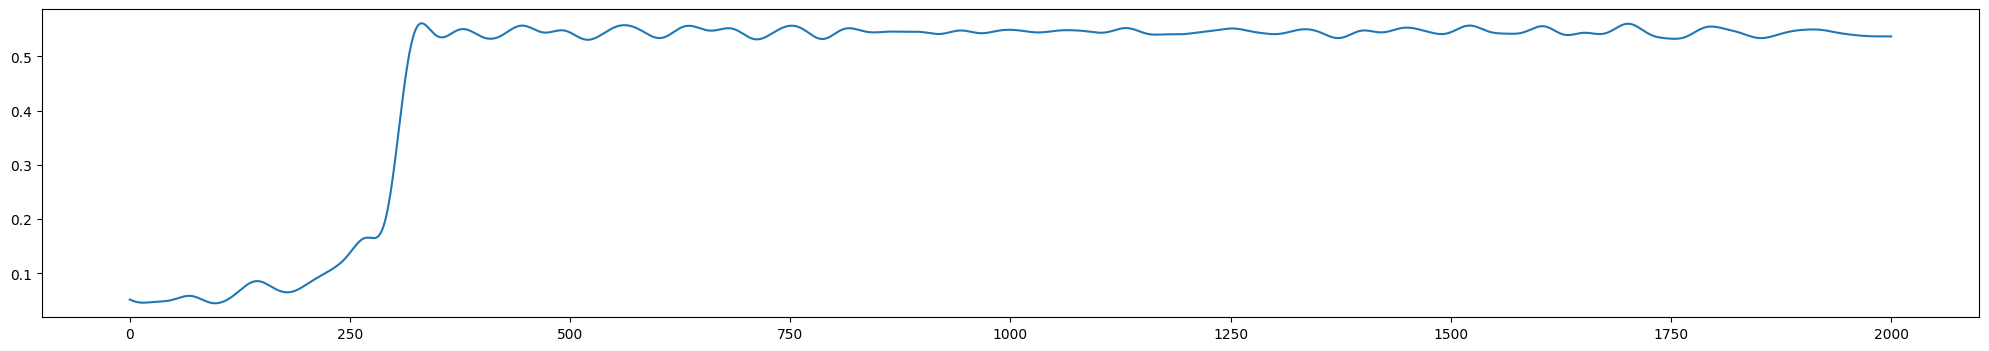

In [311]:
data = mbn.GLOBAL_ORDER_VERBOSE
cutoff_freq = 0.02
fs = 20
t = np.linspace(0, mbn.NEPOCHS-1, mbn.NEPOCHS)*mbn.DT
f_signal = 2.0

trans_time_start, trans_time_end, filt_1 = count_transitions_time(data=data, t=t, fs=fs, cutoff_freq=cutoff_freq, window_size=10, stride=9, threshold=0.225)
print(
    "Total Transitions:", len(trans_time_start), 
    "\nTransition Time Starts:", trans_time_start,
    # "\nTransition Time Ends:", trans_time_end
)

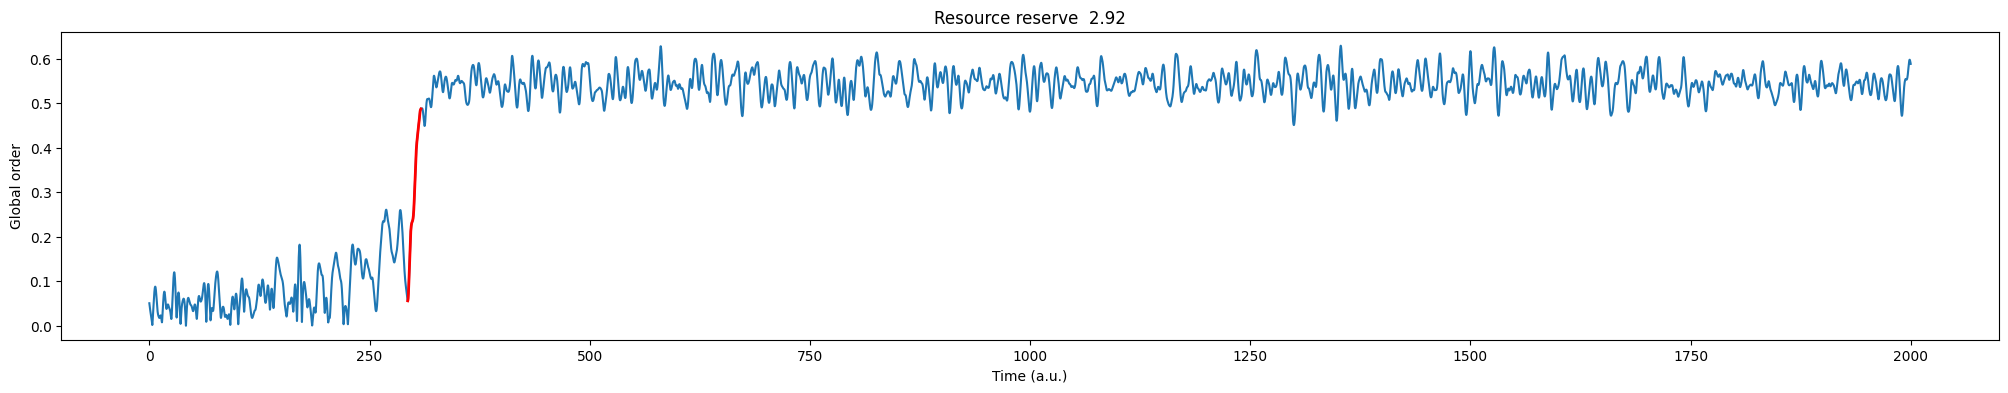

In [388]:
f = plt.figure(figsize=(25, 4))
plt.title("Resource reserve  " + str(mbn.LAMBDA_O)) 
plt.plot(np.linspace(0, mbn.NEPOCHS-1, mbn.NEPOCHS)*mbn.DT, mbn.GLOBAL_ORDER_VERBOSE)

highlight_start = int(293.4*20)
highlight_end = int(293.4*20+300)

plt.plot((np.linspace(0, mbn.NEPOCHS-1, mbn.NEPOCHS)*mbn.DT)[highlight_start:highlight_end], 
         mbn.GLOBAL_ORDER_VERBOSE[highlight_start:highlight_end], label='Highlighted Section', color='red', linewidth=2)

plt.ylabel("Global order")
plt.xlabel("Time (a.u.)")
plt.show()

<h1><b>Sample Run</b></h1>

In [421]:
swn2 = MBN_RC(nepochs=40000, 
             dt=0.05, 
             lambda_o=2.82, 
             alpha=0.1,
             beta=0.02,
             plot_bifurcation=False)

swn2.run_model()

d:\__nitin_private__\__iitj__\assignment-iitj-main\tES\Mouse brain network\MouseBrainLib\mb_communities.npz already exists
DataUtils initialized
Average shortest path length:  2.1057608395470866
Avg clustering coefficient:  0.37852781810835767
LAMBDA_O=2.82, Global Order(R)=0.0567229449212251
LAMBDA_O=2.82, Global Order(R)=0.06643967710315636
LAMBDA_O=2.82, Global Order(R)=0.07594285834890552
LAMBDA_O=2.82, Global Order(R)=0.07589158684301922
LAMBDA_O=2.82, Global Order(R)=0.14042048887340783
LAMBDA_O=2.82, Global Order(R)=0.02944329212905662
LAMBDA_O=2.82, Global Order(R)=0.031328795287166235
LAMBDA_O=2.82, Global Order(R)=0.03024396387771314
LAMBDA_O=2.82, Global Order(R)=0.09492871637487801
LAMBDA_O=2.82, Global Order(R)=0.10223523051864421
LAMBDA_O=2.82, Global Order(R)=0.14056551252109478
LAMBDA_O=2.82, Global Order(R)=0.056653333018367946
LAMBDA_O=2.82, Global Order(R)=0.03519588282692875
LAMBDA_O=2.82, Global Order(R)=0.07966390470220709
LAMBDA_O=2.82, Global Order(R)=0.04062243

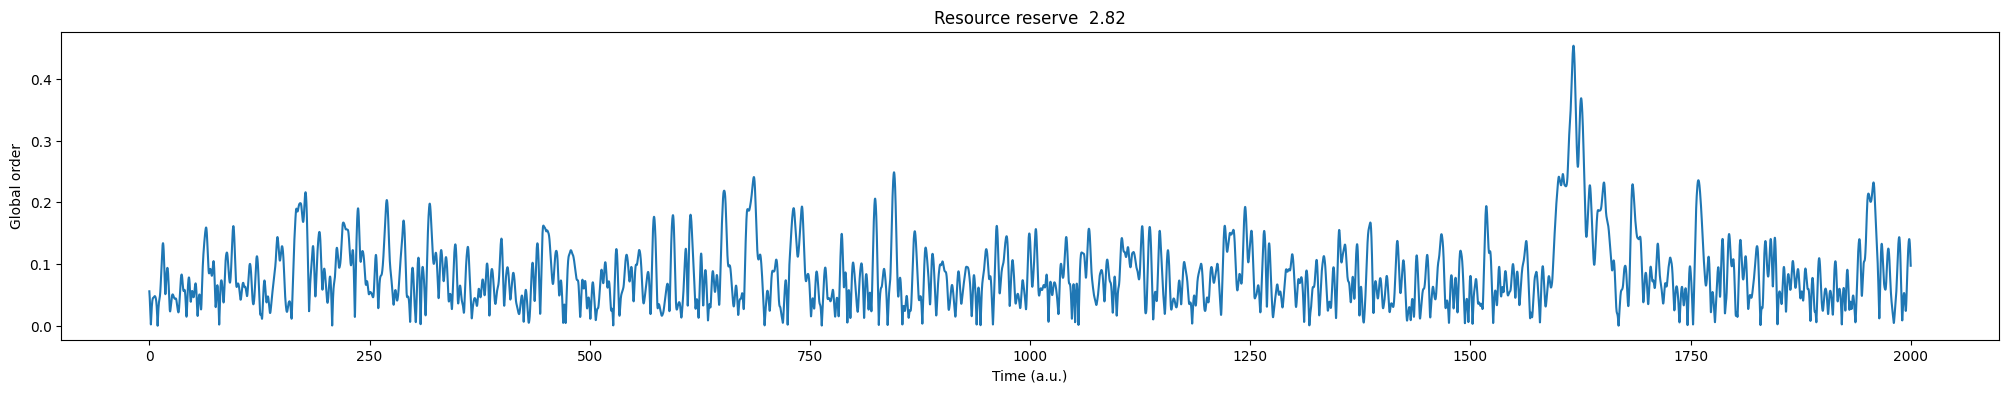

In [422]:
f = plt.figure(figsize=(25, 4))
plt.title("Resource reserve  " + str(swn2.LAMBDA_O)) 
plt.plot(np.linspace(0, swn2.NEPOCHS-1, swn2.NEPOCHS)*swn2.DT, swn2.GLOBAL_ORDER_VERBOSE)
plt.ylabel("Global order")
plt.xlabel("Time (a.u.)")
plt.show()

1 [1594.0] []


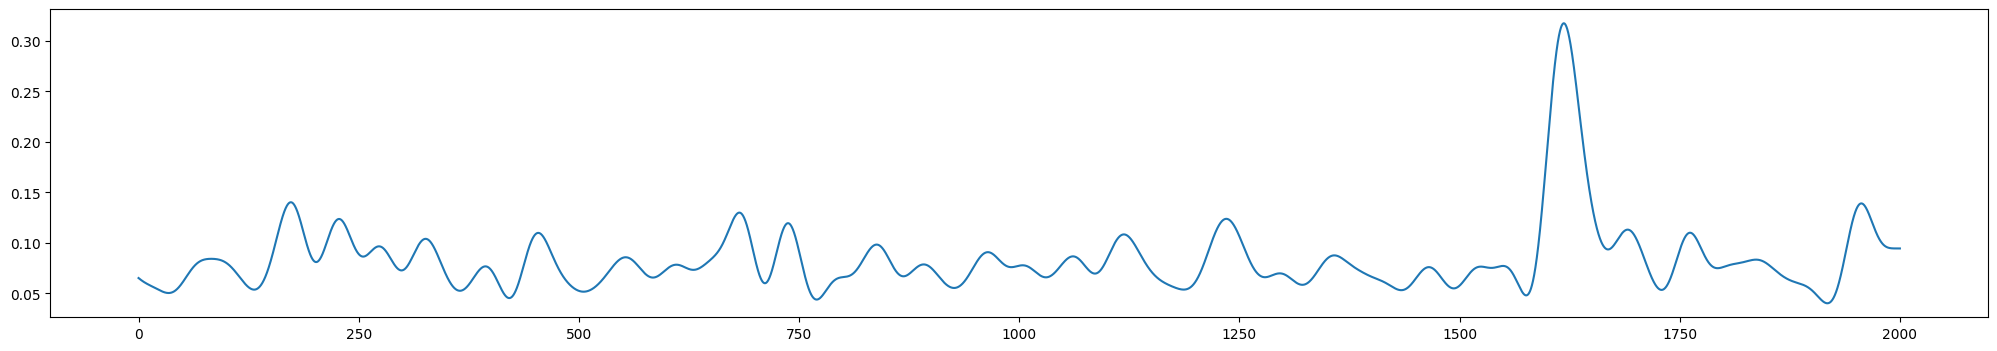

In [512]:
data = swn2.GLOBAL_ORDER_VERBOSE
cutoff_freq = 0.02
fs = 20
t = np.linspace(0, swn2.NEPOCHS-1, swn2.NEPOCHS)*swn2.DT
f_signal = 2.0

trans_time_start, trans_time_end, filt_1 = count_transitions_time(data=data, t=t, fs=fs, cutoff_freq=cutoff_freq, window_size=15, stride=10, threshold=0.1405)
print(len(trans_time_start), trans_time_start, trans_time_end)

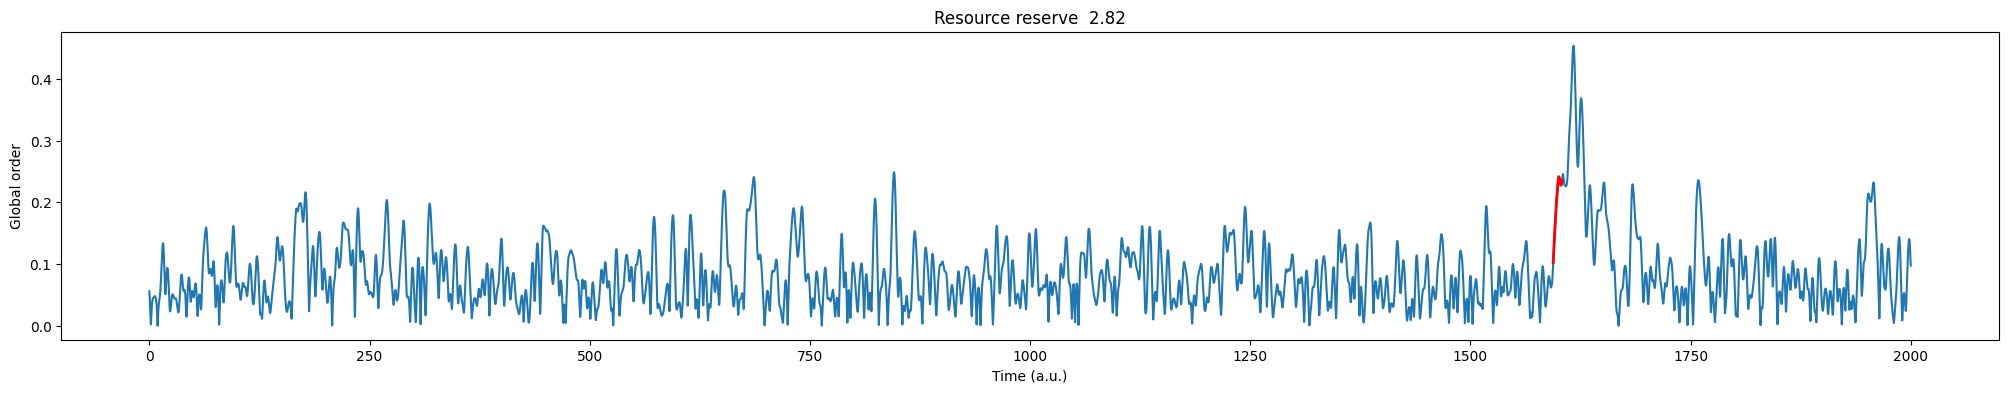

In [513]:
f = plt.figure(figsize=(25, 4))
plt.title("Resource reserve  " + str(swn2.LAMBDA_O)) 
plt.plot(np.linspace(0, swn2.NEPOCHS-1, swn2.NEPOCHS)*swn2.DT, swn2.GLOBAL_ORDER_VERBOSE)

highlight_start = [int(i*20) for i in trans_time_start]
highlight_end = [int(i*20 + 200) for i in trans_time_start]

plt.plot((np.linspace(0, swn2.NEPOCHS-1, swn2.NEPOCHS)*swn2.DT)[highlight_start[0]:highlight_end[0]], swn2.GLOBAL_ORDER_VERBOSE[highlight_start[0]:highlight_end[0]], label='Highlighted Section', color='red', linewidth=2)
# plt.plot((np.linspace(0, swn2.NEPOCHS-1, swn2.NEPOCHS)*swn2.DT)[(highlight_start[1]-20):(highlight_end[1])], swn2.GLOBAL_ORDER_VERBOSE[(highlight_start[1]-20):(highlight_end[1])], label='Highlighted Section', color='red', linewidth=2)

plt.ylabel("Global order")
plt.xlabel("Time (a.u.)")
plt.show()

SWN2 >> Transition Time : 200 a.u.

In [514]:
mbn2 = MBN_RC(nepochs=40000, 
             dt=0.05, 
             lambda_o=3.21, 
             alpha=0.3,
             beta=0.05,
             plot_bifurcation=False)
mbn2.run_model()

d:\__nitin_private__\__iitj__\assignment-iitj-main\tES\Mouse brain network\MouseBrainLib\mb_communities.npz already exists
DataUtils initialized
Average shortest path length:  2.1057608395470866
Avg clustering coefficient:  0.37852781810835767
LAMBDA_O=3.21, Global Order(R)=0.04688792947297855
LAMBDA_O=3.21, Global Order(R)=0.6136698797024461
LAMBDA_O=3.21, Global Order(R)=0.579065760500948
LAMBDA_O=3.21, Global Order(R)=0.6348237264331328
LAMBDA_O=3.21, Global Order(R)=0.6579391780413714
LAMBDA_O=3.21, Global Order(R)=0.6198051778215242
LAMBDA_O=3.21, Global Order(R)=0.634403792313121
LAMBDA_O=3.21, Global Order(R)=0.6326850951826363
LAMBDA_O=3.21, Global Order(R)=0.6666304502739065
LAMBDA_O=3.21, Global Order(R)=0.6883227868329509
LAMBDA_O=3.21, Global Order(R)=0.6774511807495274
LAMBDA_O=3.21, Global Order(R)=0.6069371905092152
LAMBDA_O=3.21, Global Order(R)=0.6323268317471136
LAMBDA_O=3.21, Global Order(R)=0.6396065985074753
LAMBDA_O=3.21, Global Order(R)=0.6039230565403797
LAMBDA_

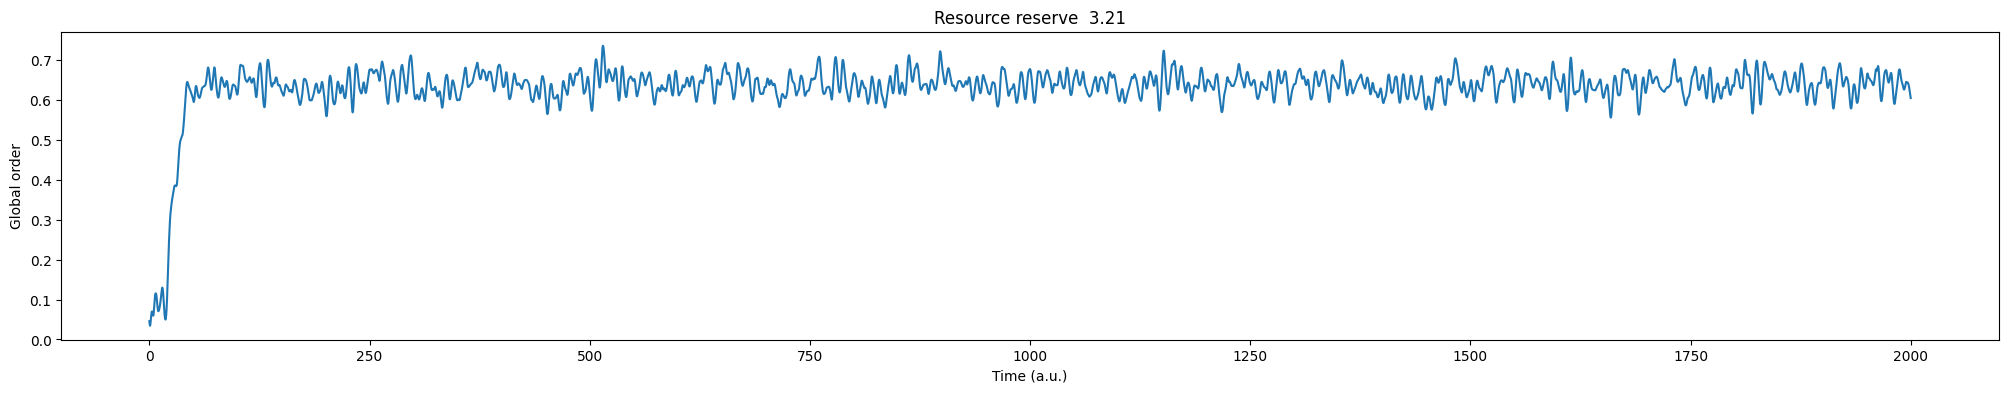

In [515]:
f = plt.figure(figsize=(25, 4))
plt.title("Resource reserve  " + str(mbn2.LAMBDA_O)) 
plt.plot(np.linspace(0, mbn2.NEPOCHS-1, mbn2.NEPOCHS)*mbn2.DT, mbn2.GLOBAL_ORDER_VERBOSE)
plt.ylabel("Global order")
plt.xlabel("Time (a.u.)")
plt.show()

1 [18.0] []


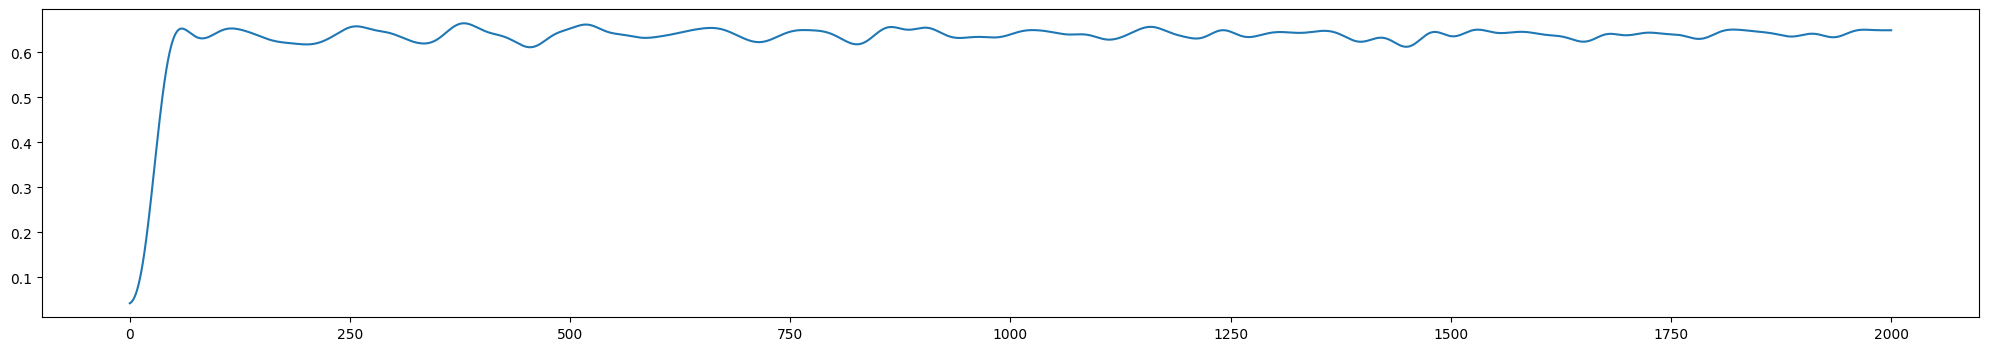

In [519]:
data = mbn2.GLOBAL_ORDER_VERBOSE
cutoff_freq = 0.02
fs = 20
t = np.linspace(0, mbn2.NEPOCHS-1, mbn2.NEPOCHS)*mbn2.DT
f_signal = 2.0

trans_time_start, trans_time_end, filt_1 = count_transitions_time(data=data, t=t, fs=fs, cutoff_freq=cutoff_freq, window_size=10, stride=9, threshold=0.18)
print(len(trans_time_start), trans_time_start, trans_time_end)

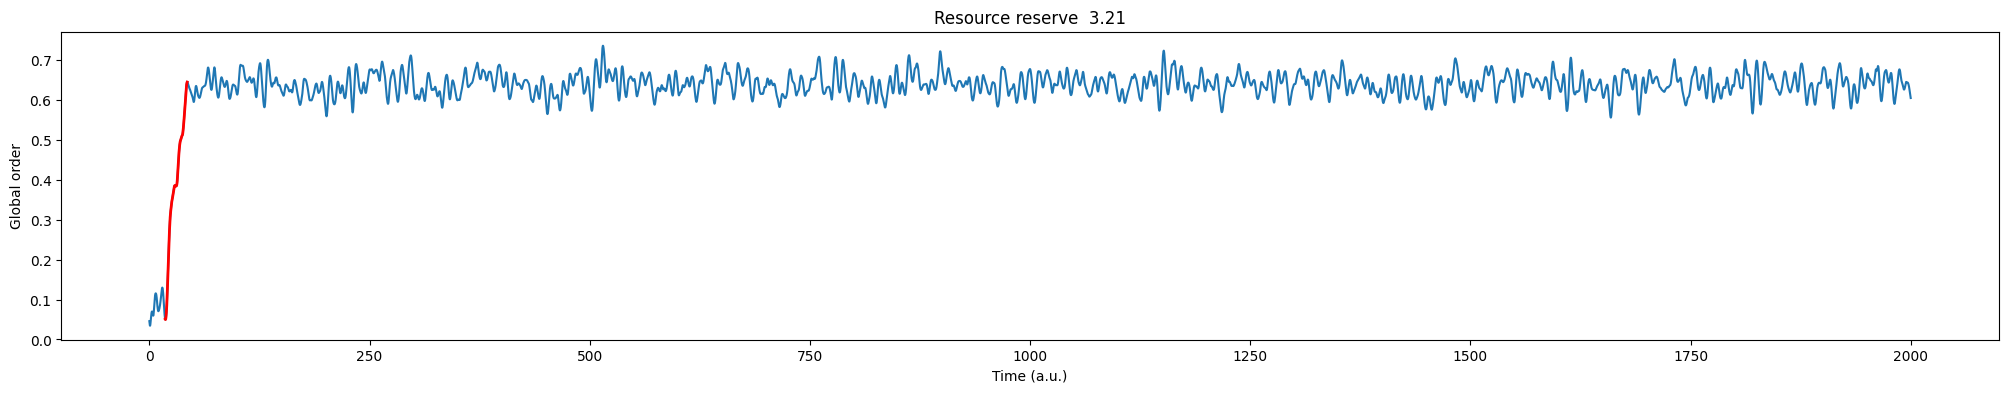

In [524]:
f = plt.figure(figsize=(25, 4))
plt.title("Resource reserve  " + str(mbn2.LAMBDA_O)) 
plt.plot(np.linspace(0, mbn2.NEPOCHS-1, mbn2.NEPOCHS)*mbn2.DT, mbn2.GLOBAL_ORDER_VERBOSE)

highlight_start = [int(i*20) for i in trans_time_start]
highlight_end = [int(i*20 + 500) for i in trans_time_start]

plt.plot((np.linspace(0, mbn2.NEPOCHS-1, mbn2.NEPOCHS)*mbn2.DT)[highlight_start[0]:highlight_end[0]], mbn2.GLOBAL_ORDER_VERBOSE[highlight_start[0]:highlight_end[0]], label='Highlighted Section', color='red', linewidth=2)
# plt.plot((np.linspace(0, mbn2.NEPOCHS-1, mbn2.NEPOCHS)*mbn2.DT)[(highlight_start[1]-20):(highlight_end[1])], mbn2.GLOBAL_ORDER_VERBOSE[(highlight_start[1]-20):(highlight_end[1])], label='Highlighted Section', color='red', linewidth=2)

plt.ylabel("Global order")
plt.xlabel("Time (a.u.)")
plt.show()

MBN2 >> Transition Time: 500 a.u.

In [20]:
# import numpy as np
# import matplotlib.pyplot as plt

# trans_time = [300, 200, 500, [200, 180]]
# trans_count = [1, 1, 1, 2]

# flat_trans_time = [item if not isinstance(item, list) else np.mean(item) for item in trans_time]

# fig= plt.subplots(figsize=(6, 6))

# plt.boxplot(trans_count)
# plt.title('Number of Transitions')
# plt.xlabel('Transitions')
# plt.ylabel('Count')

# plt.show()

# trans_time = [300, 200, 500, [200, 180]]
# trans_count = [1, 1, 1, 2]

# flat_trans_time = [item if not isinstance(item, list) else np.mean(item) for item in trans_time]

# fig= plt.subplots(figsize=(6, 6))

# plt.boxplot(flat_trans_time)
# plt.title('Transition Time')
# plt.xlabel('Transitions')
# plt.ylabel('a.u.')

# plt.show()

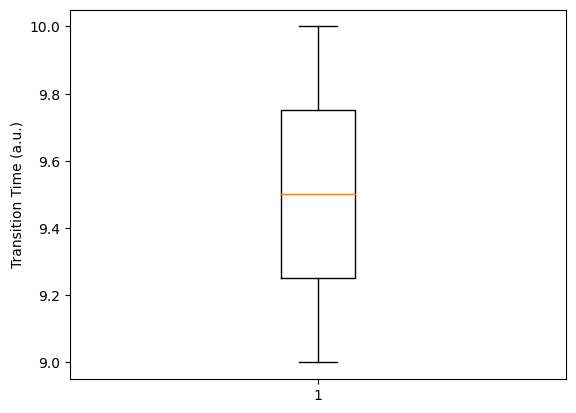

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.boxplot([200/20, 180/20])

plt.ylabel("Transition Time (a.u.)")
plt.show()



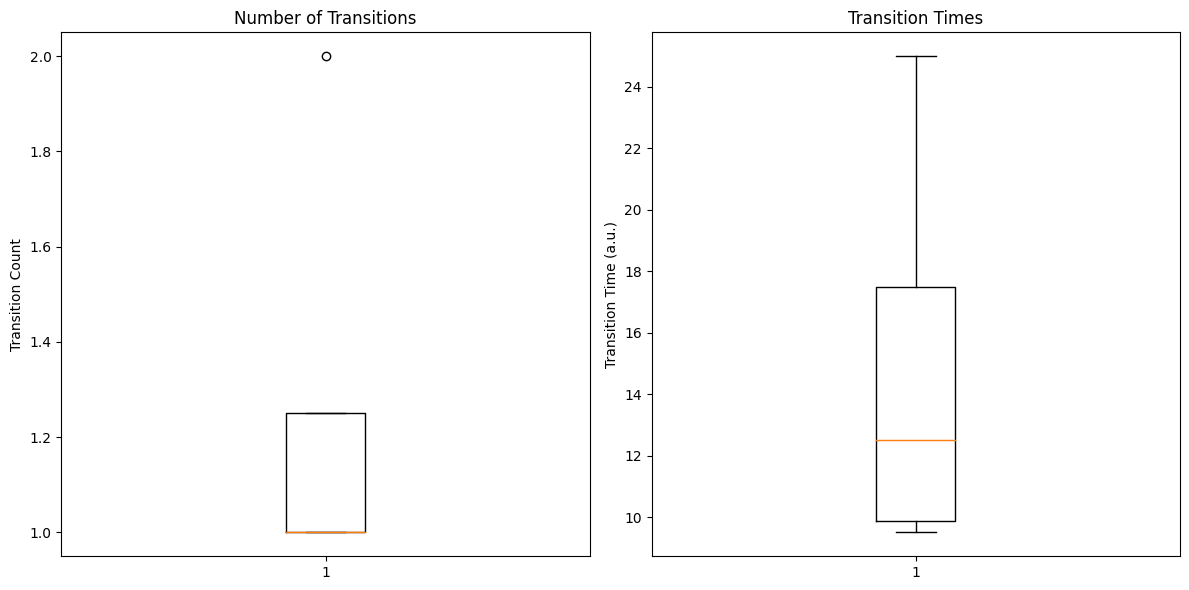

In [4]:
import numpy as np
import matplotlib.pyplot as plt

trans_time = [300/20, 200/20, 500/20, [200/20, 180/20]]
trans_count = [1, 1, 1, 2]

flat_trans_time = [item if not isinstance(item, list) else np.mean(item) for item in trans_time]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].boxplot(trans_count)
axes[0].set_title('Number of Transitions')
axes[0].set_ylabel('Transition Count')

axes[1].boxplot(flat_trans_time)
axes[1].set_title('Transition Times')
axes[1].set_ylabel('Transition Time (a.u.)')

plt.tight_layout()
plt.show()


### Bifurcation diagram

In [193]:
mbn = MBN_RC(
    nepochs=2400000, 
    dt=0.05, 
    lambda_o=2.4, 
    plot_bifurcation=True, 
    epochs_per_lambda_o=40000, 
    step_size_lambda_o=0.01
)
mbn.run_model()

d:\__nitin_private__\__iitj__\assignment-iitj-main\tES\Mouse brain network\MouseBrainLib\mb_communities.npz already exists
DataUtils initialized
Average shortest path length:  2.1057608395470866
Avg clustering coefficient:  0.37852781810835767

LAMBDA_O=2.4099999999999997, Global Order (R)=0.03630987315618745

LAMBDA_O=2.4099999999999997, Global Order(R)=0.03630987315618745
LAMBDA_O=2.4099999999999997, Global Order(R)=0.04771577986782771
LAMBDA_O=2.4099999999999997, Global Order(R)=0.05098397304121959
LAMBDA_O=2.4099999999999997, Global Order(R)=0.12415491593487515
LAMBDA_O=2.4099999999999997, Global Order(R)=0.08569323100408793
LAMBDA_O=2.4099999999999997, Global Order(R)=0.028118279989016174
LAMBDA_O=2.4099999999999997, Global Order(R)=0.06057601351911827
LAMBDA_O=2.4099999999999997, Global Order(R)=0.11683803305819698
LAMBDA_O=2.4099999999999997, Global Order(R)=0.03291490086810249
LAMBDA_O=2.4099999999999997, Global Order(R)=0.09128261597556607
LAMBDA_O=2.4099999999999997, Global O

KeyboardInterrupt: 

**Loading from saved file instead**

In [ ]:
loaded_data = np.load("../../../../datastore/explosive_sync/Mouse brain network/mb_data_adaptive_a_0.01_b_0.002.npz")

GLOBAL_ORDER_VERBOSE_RC = loaded_data['arr1']
LAMBDA_O_RC_ = loaded_data['arr2']
# LAMBDA_RC_ = loaded_data['arr3']

print("done")

done


In [ ]:
noise = np.random.normal(loc=0.0, scale=0.006, size=LAMBDA_O_RC_.shape)
LAMBDA_O_RC_noise = LAMBDA_O_RC_ + noise

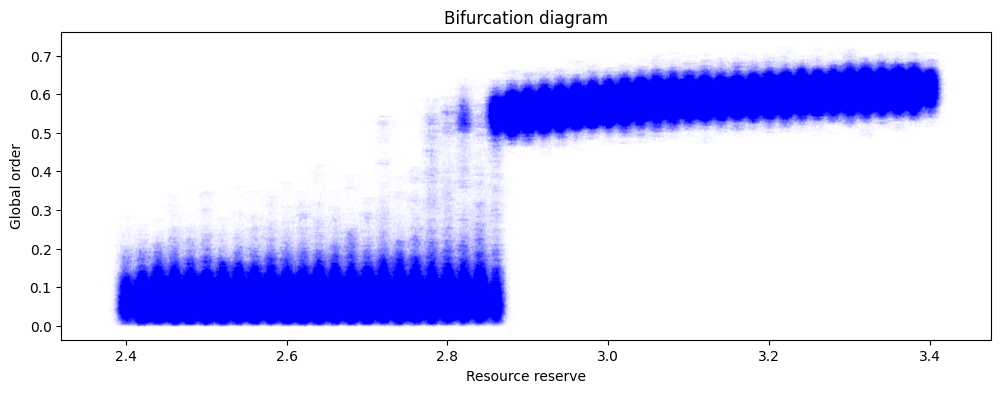

In [ ]:
f = plt.figure(figsize=(12, 4))
plt.title("Bifurcation diagram") 

plt.scatter(
    LAMBDA_O_RC_noise, GLOBAL_ORDER_VERBOSE_RC, 
    s=0.05, alpha=0.03, color='blue'
)

plt.ylabel("Global order")
plt.xlabel("Resource reserve")
plt.show()

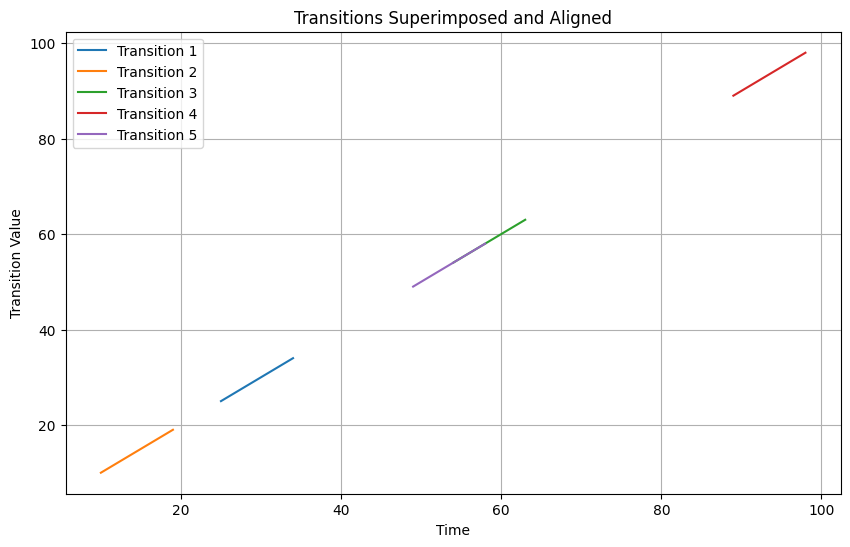

Average start time: 45.4


In [185]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data for transitions
num_transitions = 5
transition_duration = 10  # Duration of each transition (in time steps)

# Generate random start times for transitions
start_times = np.random.randint(0, 100, size=num_transitions)

# Plot all transitions superimposed, aligned to the start time of each transition
plt.figure(figsize=(10, 6))

for i, start_time in enumerate(start_times):
    # Generate transition data (simplified as a linearly increasing sequence for demonstration)
    transition_data = np.arange(transition_duration) + start_time

    # Plot the transition data, aligned to the start time
    plt.plot(np.arange(transition_duration) + start_time, transition_data, label=f'Transition {i+1}')

plt.xlabel('Time')
plt.ylabel('Transition Value')
plt.title('Transitions Superimposed and Aligned')
plt.legend()
plt.grid(True)
plt.show()

# Display a single number (e.g., the average of start times)
average_start_time = np.mean(start_times)
print(f"Average start time: {average_start_time}")
